In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [1]:
diabetes_dataset = pd.read_csv('diabetes.csv')

NameError: name 'pd' is not defined

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset[diabetes_dataset.duplicated()]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2) 
# stratify=y means that the data is split in a stratified fashion, using this as the class labels.

NameError: name 'train_test_split' is not defined

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (537, 8) (231, 8)


In [ ]:
classifier=svm.SVC(kernel='linear') #Model 


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_train_prediction = classifier.predict(x_train)
train_data_accuracy= accuracy_score(y_train_prediction,y_train)

In [ ]:
print(train_data_accuracy)

0.7802607076350093


In [ ]:
y_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(y_test_prediction,y_test)



In [ ]:
print(test_data_accuracy)

0.7748917748917749


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
sX_train=ss.fit_transform(x_train)
sX_test=ss.fit_transform(x_test)

In [ ]:
sX_test

array([[-0.86343837,  0.8652341 , -0.66876691, ..., -0.19244355,
         0.25937726, -0.37208389],
       [-0.86343837, -0.66836828,  0.11174272, ..., -1.79453159,
        -1.08477131, -1.05087068],
       [ 0.98336037,  0.58355203,  1.22675648, ...,  0.12797406,
        -0.29826711,  0.4763996 ],
       ...,
       [-0.86343837, -3.70427502, -1.11477241, ..., -0.88900357,
        -1.10733495, -0.96602233],
       [-0.55563858, -0.54317625, -0.55726553, ..., -0.95865957,
         0.42054616, -0.88117398],
       [-0.24783879,  1.61638628, -0.22276141, ...,  0.47625407,
        -0.41108533, -0.28723554]], shape=(231, 8))

In [ ]:
scmodel=svm.SVC(kernel='linear') #Model 

In [ ]:
scmodel.fit(sX_train,y_train)
sy_train_prediction = scmodel.predict(sX_train)
scaled_train_data_accuracy= accuracy_score(sy_train_prediction,y_train)


In [ ]:
scmodel.fit(sX_test, y_test)
sy_test_prediction = scmodel.predict(sX_test)
scaled_test_data_accuracy = accuracy_score(sy_test_prediction, y_test)

In [ ]:
scaled_test_data_accuracy

0.7922077922077922

In [ ]:
scaled_train_data_accuracy


0.7821229050279329

In [ ]:
cm_train =confusion_matrix(y_train,y_train_prediction)



NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=100)

In [ ]:
import pickle
filename = 'diabetese_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
cm_train =confusion_matrix(y_train,y_train_prediction)

NameError: name 'confusion_matrix' is not defined

In [ ]:
cm_test=confusion_matrix(y_test,y_test_prediction)

Text(0.5, 1.0, 'Confusion Matrix- svm\xa0Classifier_test\xa0')

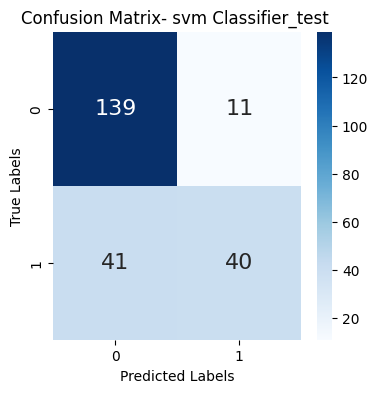

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier_test ')

In [ ]:
cm_train

array([[311,  39],
       [ 79, 108]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Confusion Matrix- svm\xa0Classifier\xa0')

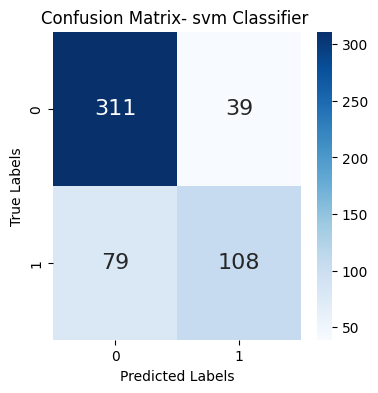

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,  max_depth=7,  min_samples_split=15, min_samples_leaf=10, random_state=3)


rf_model.fit(x_train, y_train)


NameError: name 'x_train' is not defined

In [ ]:
rf_y_train_prediction = rf_model.predict(sX_train)
rf_train_data_accuracy= accuracy_score(rf_y_train_prediction,y_train)


In [ ]:
cm_train =confusion_matrix(y_train,rf_y_train_prediction)
print(cm_train)

[[323  27]
 [ 58 129]]


In [ ]:
cm_train

array([[323,  27],
       [ 58, 129]])

In [ ]:
rf_train_data_accuracy

0.8417132216014898

Text(0.5, 1.0, 'Confusion Matrix- svm\xa0Classifier\xa0')

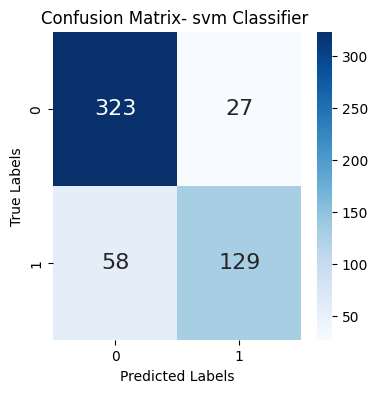

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

In [ ]:
rf_y_test_prediction = rf_model.predict(sX_test)
rf_test_data_accuracy= accuracy_score(rf_y_test_prediction,y_test)

In [ ]:
rf_test_data_accuracy

0.7705627705627706

In [ ]:
cm_test =confusion_matrix(y_test,rf_y_test_prediction)
print(cm_test)

[[130  20]
 [ 33  48]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=3)
lr_model.fit(sX_train, y_train)


LogisticRegression(random_state=3)

In [ ]:
lr_y_train_prediction = lr_model.predict(sX_train)
lr_train_data_accuracy= accuracy_score(lr_y_train_prediction,y_train)

In [ ]:
lr_train_data_accuracy

0.7802607076350093

In [ ]:
lr_y_test_prediction = lr_model.predict(sX_test)
lr_test_data_accuracy= accuracy_score(lr_y_test_prediction,y_test)

In [ ]:
lr_test_data_accuracy

0.7705627705627706